# FREQ Baseline (sintagmas)

In [19]:
import pickle
from collections import Counter
import re
import ipy_table
import nltk
import os
import numpy as np
import pandas as pd
import spacy
import random
from spacy.pipeline import Sentencizer
import json
from matplotlib import pyplot
import xmltodict
from dicttoxml import dicttoxml
from xml.dom.minidom import parseString

In [5]:
%run ../funcoes.py

Loading functions...


In [6]:
# spacy model
nlp = spacy.load("pt_core_news_lg")

sentencizer = nlp.create_pipe("sentencizer")
punct = [x for x in sentencizer.punct_chars]
punct.append('...')
punct.append('..')
config = {"punct_chars": punct}

#sentencizer = Sentencizer(punct_chars=punct)
nlp.add_pipe("sentencizer", first=True, config=config)

print(nlp.pipe_names)

['sentencizer', 'tok2vec', 'morphologizer', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [7]:
# vargas datasets
with open('../data/aspects_hotel.dat', "rb") as f: implicitHotel = pickle.load(f)
with open('../data/aspects_camera.dat', "rb") as f: implicitCamera = pickle.load(f)
with open('../data/aspects_livro.dat', "rb") as f: implicitLivro = pickle.load(f)
with open('../data/aspects_smartphone.dat', "rb") as f: implicitSmartphone = pickle.load(f)

In [8]:
vargasDatasets= {
    'camera'     : implicitCamera,
    'livro'      : implicitLivro,
    'smartphone' : implicitSmartphone,
    'hotel'      : implicitHotel
}
datasets = [ 'camera', 'livro', 'smartphone', 'hotel' ]

In [9]:
a = list(range(0,60))
random.Random(42).shuffle(a)
treinamento = a[:42] # 70%
teste = a[42:]       # 30%
print(teste)
print(treinamento)

[57, 2, 27, 37, 5, 34, 51, 43, 6, 56, 8, 14, 15, 17, 47, 1, 7, 40]
[38, 23, 54, 11, 16, 20, 55, 58, 33, 19, 9, 36, 31, 45, 30, 49, 3, 21, 50, 4, 29, 10, 59, 22, 41, 24, 0, 44, 25, 52, 18, 28, 39, 26, 48, 12, 35, 42, 32, 53, 13, 46]


In [10]:
a = list(range(0,60))
print("len",len(a))
random.Random(42).shuffle(a)
treinamentoA = a[:42] # 70%
testeA = a[42:]       # 30%
print("len teste:",len(testeA),len(treinamentoA))
print(testeA)
print(treinamentoA)

len 60
len teste: 18 42
[57, 2, 27, 37, 5, 34, 51, 43, 6, 56, 8, 14, 15, 17, 47, 1, 7, 40]
[38, 23, 54, 11, 16, 20, 55, 58, 33, 19, 9, 36, 31, 45, 30, 49, 3, 21, 50, 4, 29, 10, 59, 22, 41, 24, 0, 44, 25, 52, 18, 28, 39, 26, 48, 12, 35, 42, 32, 53, 13, 46]


In [11]:
b = list(range(60,200))
print("len",len(b))
random.Random(42).shuffle(b)
treinamentoB = b[:98] # 70%
testeB = b[98:]       # 30%
print("len teste:",len(testeB),len(treinamentoB))
print(testeB)
print(treinamentoB)

len 140
len teste: 42 98
[73, 164, 169, 87, 79, 172, 103, 114, 178, 80, 171, 157, 60, 163, 194, 135, 195, 199, 113, 129, 149, 143, 151, 85, 131, 63, 137, 124, 89, 115, 83, 67, 68, 168, 82, 86, 95, 117, 122, 130, 66, 88]
[188, 144, 198, 69, 123, 76, 136, 161, 109, 170, 61, 192, 162, 187, 185, 160, 175, 91, 78, 125, 81, 148, 189, 96, 152, 112, 99, 90, 182, 110, 92, 180, 134, 158, 116, 111, 181, 174, 62, 196, 183, 126, 74, 177, 120, 165, 121, 138, 132, 176, 147, 127, 94, 141, 100, 98, 64, 101, 159, 119, 153, 77, 102, 193, 154, 107, 167, 142, 166, 191, 146, 155, 173, 145, 179, 186, 150, 190, 84, 133, 106, 139, 140, 97, 197, 70, 156, 75, 128, 118, 65, 93, 184, 104, 105, 72, 108, 71]


In [12]:
treinamento = treinamentoA + treinamentoB
teste = testeA + testeB
print("len teste:",len(teste),len(treinamento))
print(teste)
print(treinamento)

len teste: 60 140
[57, 2, 27, 37, 5, 34, 51, 43, 6, 56, 8, 14, 15, 17, 47, 1, 7, 40, 73, 164, 169, 87, 79, 172, 103, 114, 178, 80, 171, 157, 60, 163, 194, 135, 195, 199, 113, 129, 149, 143, 151, 85, 131, 63, 137, 124, 89, 115, 83, 67, 68, 168, 82, 86, 95, 117, 122, 130, 66, 88]
[38, 23, 54, 11, 16, 20, 55, 58, 33, 19, 9, 36, 31, 45, 30, 49, 3, 21, 50, 4, 29, 10, 59, 22, 41, 24, 0, 44, 25, 52, 18, 28, 39, 26, 48, 12, 35, 42, 32, 53, 13, 46, 188, 144, 198, 69, 123, 76, 136, 161, 109, 170, 61, 192, 162, 187, 185, 160, 175, 91, 78, 125, 81, 148, 189, 96, 152, 112, 99, 90, 182, 110, 92, 180, 134, 158, 116, 111, 181, 174, 62, 196, 183, 126, 74, 177, 120, 165, 121, 138, 132, 176, 147, 127, 94, 141, 100, 98, 64, 101, 159, 119, 153, 77, 102, 193, 154, 107, 167, 142, 166, 191, 146, 155, 173, 145, 179, 186, 150, 190, 84, 133, 106, 139, 140, 97, 197, 70, 156, 75, 128, 118, 65, 93, 184, 104, 105, 72, 108, 71]


In [13]:
aspectsTest = {
    'camera'     : {'aspects' : [], 'implicits' : [], 'explicits' : [], 'aspectsLemma' : [], 'implicitsLemma' : [], 'explicitsLemma' : []},
    'livro'      : {'aspects' : [], 'implicits' : [], 'explicits' : [], 'aspectsLemma' : [], 'implicitsLemma' : [], 'explicitsLemma' : []},
    'smartphone' : {'aspects' : [], 'implicits' : [], 'explicits' : [], 'aspectsLemma' : [], 'implicitsLemma' : [], 'explicitsLemma' : []},
    'hotel'      : {'aspects' : [], 'implicits' : [], 'explicits' : [], 'aspectsLemma' : [], 'implicitsLemma' : [], 'explicitsLemma' : []},
}
aspectsTrain = {
    'camera'     : {'aspects' : [], 'implicits' : [], 'explicits' : [], 'aspectsLemma' : [], 'implicitsLemma' : [], 'explicitsLemma' : []},
    'livro'      : {'aspects' : [], 'implicits' : [], 'explicits' : [], 'aspectsLemma' : [], 'implicitsLemma' : [], 'explicitsLemma' : []},
    'smartphone' : {'aspects' : [], 'implicits' : [], 'explicits' : [], 'aspectsLemma' : [], 'implicitsLemma' : [], 'explicitsLemma' : []},
    'hotel'      : {'aspects' : [], 'implicits' : [], 'explicits' : [], 'aspectsLemma' : [], 'implicitsLemma' : [], 'explicitsLemma' : []},
}
aspectsAll = {
    'camera'     : {'aspects' : [], 'implicits' : [], 'explicits' : [], 'aspectsLemma' : [], 'implicitsLemma' : [], 'explicitsLemma' : []},
    'livro'      : {'aspects' : [], 'implicits' : [], 'explicits' : [], 'aspectsLemma' : [], 'implicitsLemma' : [], 'explicitsLemma' : []},
    'smartphone' : {'aspects' : [], 'implicits' : [], 'explicits' : [], 'aspectsLemma' : [], 'implicitsLemma' : [], 'explicitsLemma' : []},
    'hotel'      : {'aspects' : [], 'implicits' : [], 'explicits' : [], 'aspectsLemma' : [], 'implicitsLemma' : [], 'explicitsLemma' : []},
}
for dataset in datasets:
    print(dataset)
    for irev, rev in enumerate((vargasDatasets[dataset])):
        for cont in rev['conteudo']:
            aspectsAll[dataset]['aspects'] += cont['aspects']
            aspectsAll[dataset]['implicits'] += cont['implicit']
            aspectsAll[dataset]['explicits'] += cont['explicit']
            aspectsAll[dataset]['aspectsLemma'] += cont['aspectsLemma']
            aspectsAll[dataset]['implicitsLemma'] += cont['implicitLemma']
            aspectsAll[dataset]['explicitsLemma'] += cont['explicitLemma']
        if irev in teste:
            print(irev,' ',end='')
            for cont in rev['conteudo']:
                aspectsTest[dataset]['aspects'] += cont['aspects']
                aspectsTest[dataset]['implicits'] += cont['implicit']
                aspectsTest[dataset]['explicits'] += cont['explicit']
                aspectsTest[dataset]['aspectsLemma'] += cont['aspectsLemma']
                aspectsTest[dataset]['implicitsLemma'] += cont['implicitLemma']
                aspectsTest[dataset]['explicitsLemma'] += cont['explicitLemma']
        else:
            print(irev,' ',end='')
            for cont in rev['conteudo']:
                aspectsTrain[dataset]['aspects'] += cont['aspects']
                aspectsTrain[dataset]['implicits'] += cont['implicit']
                aspectsTrain[dataset]['explicits'] += cont['explicit']
                aspectsTrain[dataset]['aspectsLemma'] += cont['aspectsLemma']
                aspectsTrain[dataset]['implicitsLemma'] += cont['implicitLemma']
                aspectsTrain[dataset]['explicitsLemma'] += cont['explicitLemma']
    print()

camera
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  
livro
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  
smartphone
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  
hotel
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71 

In [14]:
implicitCamera[0]

{'titulo': 'review 1',
 'conteudo': [{'linha': 'Vale a pena cada centavo investido nesta máquina. O que gostei: Excelente qualidade da imagem; Bonita; Fácil manuseio. O que não gostei: Acessórios somente da Sony',
   'aspects': ['máquina',
    'cada centavo investido',
    'manuseio',
    'qualidade da imagem',
    'bonita',
    'acessórios'],
   'aspectsLemma': ['máquina',
    'cada centavo investir',
    'manusear',
    'qualidade da imagem',
    'bonito',
    'acessório'],
   'implicit': ['cada centavo investido', 'bonita'],
   'implicitLemma': ['cada centavo investir', 'bonito'],
   'explicit': ['máquina', 'manuseio', 'qualidade da imagem', 'acessórios'],
   'explicitLemma': ['máquina',
    'manusear',
    'qualidade da imagem',
    'acessório'],
   'spacy': Vale a pena cada centavo investido nesta máquina. O que gostei: Excelente qualidade da imagem; Bonita; Fácil manuseio. O que não gostei: Acessórios somente da Sony}]}

In [15]:
nounsList = {
    'camera' : [],
    'livro' : [],
    'smartphone' : [],
    'hotel'   :[]
}
tokensCont = {
    'camera' : 0,
    'livro' : 0,
    'smartphone' : 0,
    'hotel'    : 0
}
poss = []
for dataset in datasets:
    for rev in vargasDatasets[dataset]:
        for cont in rev['conteudo']:
            for sent in cont['spacy'].sents:
                for word in sent:
                    poss.append(word.pos_)
                    if word.pos_ != 'PUNCT':
                        tokensCont[dataset] += 1
                    if word.pos_ == 'NOUN':
                        nounsList[dataset].append(word.lemma_)

In [16]:
set(poss)

{'ADJ',
 'ADP',
 'ADV',
 'AUX',
 'CCONJ',
 'DET',
 'INTJ',
 'NOUN',
 'NUM',
 'PRON',
 'PROPN',
 'PUNCT',
 'SCONJ',
 'SPACE',
 'SYM',
 'VERB',
 'X'}

In [17]:
tokensCont

{'camera': 3997, 'livro': 5515, 'smartphone': 6210, 'hotel': 13940}

## Buscar corte no conjunto de testes

In [30]:
for cut in np.arange(0.001, 0.011, 0.001):
    cut = round(cut,3)
    print(cut)

0.001
0.002
0.003
0.004
0.005
0.006
0.007
0.008
0.009
0.01


In [31]:
candidateAspects = {'camera' : [], 'livro' : [], 'smartphone' : [], 'hotel' : []}
for dataset in datasets:
    print(dataset)
    cut = tokensCont[dataset] * 0.01
    print(cut)
    
    contNouns = Counter(nounsList[dataset])
    #print(contNouns)
    aspects = [x for x in contNouns if contNouns[x] >= cut ]
    candidateAspects[dataset] = aspects
    print('aspects',aspects)
    metricas = calculaMetricas(aspects, aspectsAll[dataset], output=True)

camera
39.97
aspects ['qualidade', 'foto']
gold: 352 pred: 2 tp: 1 fp: 1 fn: 351
---
precisão        :  0.5
revocação       :  0.002840909090909091
medida f        :  0.005649717514124295
---
total explicits :  299
explicits ok    :  0
% explicits ok  :  0.0
---
total implicits :  53
implicits ok    :  1
% implicits ok  :  1.89
livro
55.15
aspects ['livrar']
gold: 330 pred: 1 tp: 0 fp: 1 fn: 330
---
precisão        :  0.0
revocação       :  0.0
medida f        :  0
---
total explicits :  304
explicits ok    :  0
% explicits ok  :  0.0
---
total implicits :  26
implicits ok    :  0
% implicits ok  :  0.0
smartphone
62.1
aspects []
gold: 455 pred: 0 tp: 0 fp: 0 fn: 455
---
precisão        :  0
revocação       :  0.0
medida f        :  0
---
total explicits :  387
explicits ok    :  0
% explicits ok  :  0.0
---
total implicits :  68
implicits ok    :  0
% implicits ok  :  0.0
hotel
139.4
aspects ['hotel']
gold: 1655 pred: 1 tp: 149 fp: 0 fn: 1506
---
precisão        :  1.0
revocação      

In [32]:
!rm teste.json

In [25]:
aspectsTest['camera']['aspects']

['preço',
 'funções',
 'manuseio',
 'sony',
 'bateria',
 'botão',
 'resolução',
 'facil de usar',
 'fotos',
 'video',
 'câmera',
 'câmera semiprofissional',
 'praticidade',
 'compacta',
 'câmera',
 'preço',
 'recursos',
 'qualidade das fotos',
 'vídeos',
 'flash',
 'prazo de entrega',
 'máquina',
 'fz35',
 'facilidade de uso',
 'design',
 'filma em hd',
 'qualidade das fotos',
 'qualidades dos filmes',
 'consumo de energia',
 'conectividade',
 'camara',
 'fotos',
 'tamanho',
 'produto',
 'câmera digital olympus',
 'menu',
 'bateria',
 'cartão de memória',
 'câmera',
 'custo-benefício',
 'volume',
 'peso',
 'camera',
 'recursos',
 'manuseio',
 'assistencia tecnica',
 'câmera',
 'produto',
 'qualidade de imagem',
 'bateria',
 'compacta',
 'custo',
 'preço',
 'qualidade de imagem',
 'navegação nas fotos',
 'memória',
 'zoom',
 'câmera',
 'recursos de configuração',
 'qualidade de imagens',
 'qualidade das fotos',
 'qualidade dos videos',
 'manual de instruções',
 'memória interna',
 'preç

In [32]:
def freqBaseline(arquivo='result.json', w2v=False, trainOnly=True, cutValue=False, selDatasets=False):
    if not selDatasets:
        selDatasets = datasets
    if os.path.exists(arquivo):
        os.remove(arquivo)    
    nounsList = { 
        'camera' : [],
        'livro' : [],
        'smartphone' : [],
        'hotel' : [],
    }
    testNounsList = {
        'camera' : [],
        'livro' : [],
        'smartphone' : [],
        'hotel' : [],
    }
    tokensCont = {
        'camera' : 0,
        'livro' : 0,
        'smartphone' : 0,
        'hotel' : 0,
    }
    sentsCont = {
        'camera' : 0,
        'livro' : 0,
        'smartphone' : 0,
        'hotel' : 0        
    }
    rets = []
    contextCentroids = {}
    # contagem de substantivos e palavras
    for dataset in selDatasets:
        for irev, rev in enumerate(vargasDatasets[dataset]):
            if (trainOnly and irev in teste): continue
            for cont in rev['conteudo']:
                for sent in cont['spacy'].sents:
                    sentsCont[dataset] += 1
                    for word in sent:
                        poss.append(word.pos_)
                        if word.pos_ != 'PUNCT':
                            tokensCont[dataset] += 1
                        if word.pos_ == 'NOUN':
                            nounsList[dataset].append(word.lemma_.lower())
                            if irev in teste:
                                testNounsList[dataset].append(word.lemma_.lower())
        if w2v:
            # centroides contextulizada word2vec
            contNouns = Counter(nounsList[dataset])
            contextWords = [x[0] for x in contNouns.most_common(10)]
            # Convertendo palavras para vetores
            contextVectors = []
            for word in contextWords:
                    if word == "quartar": word = "quarto"
                    contextVectors.append(emb[word])
            # Calculando centroide dos vetores
            contextCentroids[dataset] = nx.mean(contextVectors, axis=0)
    # aplicando corte entre 0% e 1% com incremento de 0.01
    stepI = 0.0001
    if cutValue:
        startI = cutValue/100
        stopI = startI + stepI / 10
    else:
        startI = 0
        stopI = 0.1001
    for dataset in selDatasets:
        domain = dataset
        # carregando tipos
        tiposAll = pd.read_csv('../data/tipologia/categorias_iacs.csv', sep=',', quoting=0, keep_default_na=False)
        tipos = tiposAll.loc[tiposAll['domain'] == domain]        
        # ferquencia de corte       
        for i in np.arange(startI, stopI, stepI):
            i = round(i,4)
            # corte definido pela quantidade de frases
            cut = sentsCont[dataset] * i
            contNouns = Counter(nounsList[dataset])
            if w2v:
                aspectosCandidatos = [x for x in contNouns if contNouns[x] >= cut and contextDetection(x, contextCentroids[dataset], 'pt')]
            else:
                aspectosCandidatos = [x for x in contNouns if contNouns[x] >= cut]
            if trainOnly:
                ret = calculaMetricas(
                    aspectosCandidatos, 
                    aspectsTrain[dataset], 
                    tipos,
                    lemma=True, 
                    output=False
                )
            else:
                aspectosCandidatos = [x for x in aspectosCandidatos if x in testNounsList[dataset]]
                aspectsTest2 = { 
                    dataset : { 
                        'aspects' : {'item' : aspectsTest[dataset]['aspects'] },
                        'aspectsLemma' : {'item' : aspectsTest[dataset]['aspectsLemma'] },
                        'implicitsLemma' : {'item' : aspectsTest[dataset]['implicitsLemma'] },
                        'explicitsLemma' : {'item' : aspectsTest[dataset]['explicitsLemma'] },
                    } }
                ret = calculaMetricas(
                    aspectosCandidatos, 
                    aspectsTest2[dataset], 
                    tipos,
                    lemma=True, 
                    output=False
                )
            # gerando resultado em xml
            xml = dicttoxml(ret, attr_type=False, custom_root='resultados')
            xmlArq = arquivo.split('.')[0]
            with open('../resultados/'+xmlArq+'_'+str(i)+'_'+domain+'.xml', 'w') as file:
                dom = parseString(xml)
                file.write(dom.toprettyxml())                    
            # gerando resultado em json
            ret['dataset'] = dataset
            ret['cut'] = i
            rets.append(ret)
            with open(arquivo, 'a') as fp:
                json.dump(ret, fp)
                fp.write("\n")
    return rets

In [56]:
res = freqBaseline('teste.json', w2v=False, cutValue=0.53, trainOnly=False, selDatasets=['camera'])
res

[{'totalAspects': 104,
  'pred': 76,
  'tp': 58,
  'fp': 45,
  'fn': 46,
  'precisao': 0.5631067961165048,
  'precisaoLaplace': 0.5619047619047619,
  'revocacao': 0.5576923076923077,
  'medidaf': 0.5603864734299517,
  'totalExplicitos': 91,
  'explicitosOk': 31,
  'pExplicitos': 0.34065934065934067,
  'totalImplicitos': 13,
  'implicitosOk': 0,
  'pImplicitos': 0.0,
  'dataset': 'camera',
  'cut': 0.0053}]

In [57]:
#!wc -l teste.json

In [58]:
#!tail teste.json

In [59]:
def freqCharts(arquivo):
    resultados = []
    for dataset in datasets:
        precisionResults = []
        recallResults = []
        fResults = []
        impResults = []
        expResults = []
        confResults = []
        maxF = 0
        maxCut = 0
        for i in np.arange(0, 0.1001, 0.0001):
            cut = round(i,4)
            pcut = round(i*100,2)
            with open(arquivo) as fp:
                for cnt, line in enumerate(fp):
                    if len(line) > 1:
                        resultado = json.loads(line)
                        if (resultado['dataset'] == dataset and resultado['cut'] == cut):
                            precisionResults.append(resultado['precisao'])
                            recallResults.append(resultado['revocacao'])
                            fResults.append(resultado['medidaf'])
                            impResults.append(resultado['pImplicitos'])
                            expResults.append(resultado['pExplicitos'])
                            confResults.append(pcut)
                            if resultado['medidaf'] > maxF:
                                maxF = resultado['medidaf']
                                maxCut = pcut
                                maxRes = resultado
        pyplot.plot(confResults, fResults, label='F-measure')
        pyplot.plot(confResults, impResults, label='Implicits')
        pyplot.plot(confResults, precisionResults, label='Precision')
        pyplot.plot(confResults, recallResults, label='Recall')
        pyplot.xlabel('Porcentagem corte')
        pyplot.title(f'Corpus: {dataset} - Med. F: {maxF:.2f} - Implícitos: {maxRes["pImplicitos"]*100:.2f} - Corte: {maxCut:.2f}')
        pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        pyplot.show()
        resultados.append(maxRes)
    return resultados

## Freq Baseline

In [60]:
res = freqBaseline('resultFreq.json')

In [61]:
import numpy as np

In [62]:
cont = 0
for i in np.arange(0, 0.1001, 0.0001):
    cont = cont + 1
cont

1001

In [63]:
!wc -l resultFreq.json

4004 resultFreq.json


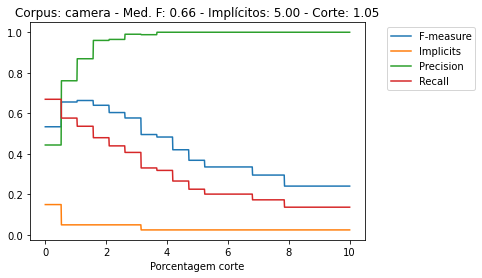

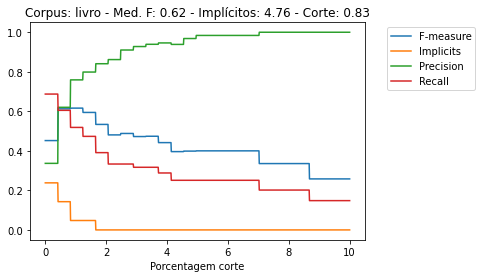

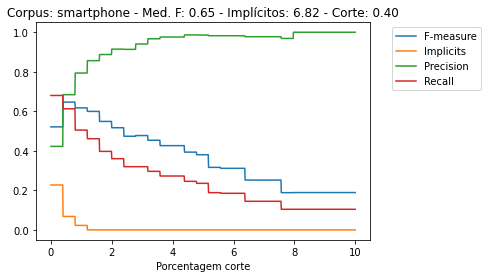

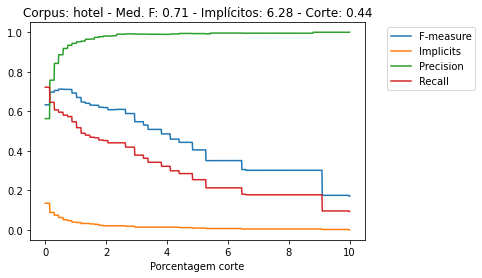

In [64]:
resultados = freqCharts('resultFreq.json')

In [33]:
# resultados com tipologia
freqBaseline('freq.json', w2v=False, cutValue=1.05, trainOnly=False, selDatasets=['camera'])
freqBaseline('freq.json', w2v=False, cutValue=0.83, trainOnly=False, selDatasets=['livro'])
freqBaseline('freq.json', w2v=False, cutValue=0.40, trainOnly=False, selDatasets=['smartphone'])
freqBaseline('freq.json', w2v=False, cutValue=0.44, trainOnly=False, selDatasets=['hotel'])

[{'totalAspects': 518,
  'pred': 133,
  'tp': 266,
  'fp': 94,
  'fn': 252,
  'precisao': 0.7388888888888889,
  'precisaoLaplace': 0.7375690607734806,
  'revocacao': 0.5135135135135135,
  'medidaf': 0.6059225512528473,
  'totalExplicitos': 292,
  'explicitosOk': 30,
  'pExplicitos': 0.10273972602739725,
  'explicitsList': ['shopping',
   'funcionário',
   'telefonar',
   'toalha',
   'tv',
   'cidade',
   'corredor',
   'recepção',
   'loja',
   'carpete',
   'localização',
   'quartar',
   'aeroporto',
   'preço',
   'chuveiro',
   'ruir',
   'apartamento',
   'hotel',
   'confortar',
   'internet',
   'estacionamento',
   'portar',
   'atendimento',
   'cozinhar',
   'instalação',
   'serviço',
   'limpeza',
   'rodoviário',
   'elevador',
   'escada'],
  'totalImplicitos': 226,
  'implicitosOk': 26,
  'pImplicitos': 0.11504424778761062,
  'implicitsList': ['prédio',
   'telefonar',
   'café',
   'comido',
   'academiar',
   'carpete',
   'mofar',
   'estruturar',
   'localização',
 

In [65]:
resultados = []
resultados.append(freqBaseline('teste.json', w2v=False, cutValue=1.05, trainOnly=False, selDatasets=['camera'])[0])
resultados.append(freqBaseline('teste.json', w2v=False, cutValue=0.83, trainOnly=False, selDatasets=['livro'])[0])
resultados.append(freqBaseline('teste.json', w2v=False, cutValue=0.40, trainOnly=False, selDatasets=['smartphone'])[0])
resultados.append(freqBaseline('teste.json', w2v=False, cutValue=0.44, trainOnly=False, selDatasets=['hotel'])[0])

In [66]:
print(f'Câmera     &  {resultados[0]["cut"]*100:.2f} &  {resultados[0]["precisao"]:.2f} & {resultados[0]["revocacao"]:.2f} & {resultados[0]["medidaf"]:.2f} & {resultados[0]["pExplicitos"]*100:.2f} & {resultados[0]["pImplicitos"]*100:.2f} \\\\'.replace('.',','))
print(f'Livro      &  {resultados[1]["cut"]*100:.2f} &  {resultados[1]["precisao"]:.2f} & {resultados[1]["revocacao"]:.2f} & {resultados[1]["medidaf"]:.2f} & {resultados[1]["pExplicitos"]*100:.2f} & {resultados[1]["pImplicitos"]*100:.2f} \\\\'.replace('.',','))
print(f'Smartphone &  {resultados[2]["cut"]*100:.2f} &  {resultados[2]["precisao"]:.2f} & {resultados[2]["revocacao"]:.2f} & {resultados[2]["medidaf"]:.2f} & {resultados[2]["pExplicitos"]*100:.2f} & {resultados[2]["pImplicitos"]*100:.2f} \\\\'.replace('.',','))
print(f'Hotel      &  {resultados[3]["cut"]*100:.2f} &  {resultados[3]["precisao"]:.2f} & {resultados[3]["revocacao"]:.2f} & {resultados[3]["medidaf"]:.2f} & {resultados[3]["pExplicitos"]*100:.2f} & {resultados[3]["pImplicitos"]*100:.2f} \\\\'.replace('.',','))

Câmera     &  1,05 &  0,65 & 0,48 & 0,55 & 26,37 & 0,00 \\
Livro      &  0,83 &  0,56 & 0,64 & 0,60 & 21,95 & 0,00 \\
Smartphone &  0,40 &  0,45 & 0,52 & 0,48 & 27,61 & 4,17 \\
Hotel      &  0,44 &  0,74 & 0,51 & 0,61 & 10,27 & 11,50 \\


## Freq Baseline com Word2Vec

In [76]:
resultados = freqBaseline('resultFreqW2V.json', w2v=True)

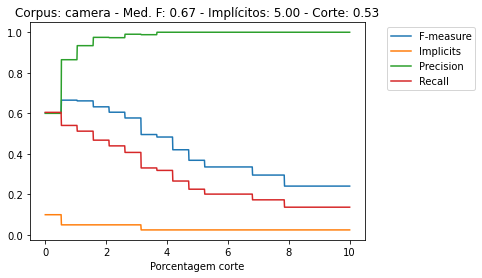

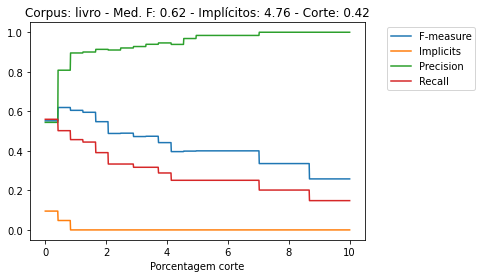

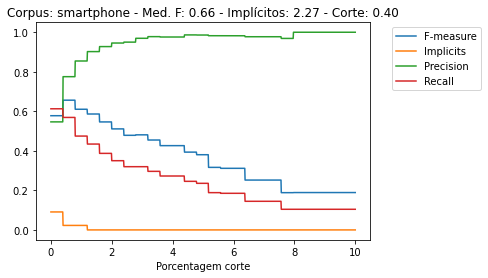

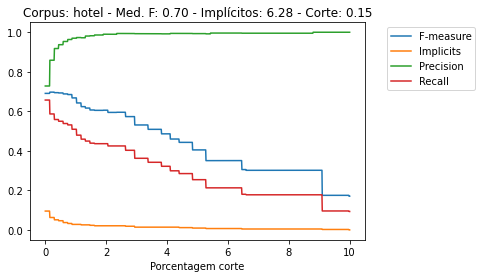

In [77]:
resultados = freqCharts('resultFreqW2V.json')

In [39]:
# resultados com tipologia
freqBaseline('freqw2v.json', w2v=True, cutValue=0.53, trainOnly=False, selDatasets=['camera'])
freqBaseline('freqw2v.json', w2v=True, cutValue=0.42, trainOnly=False, selDatasets=['livro'])
freqBaseline('freqw2v.json', w2v=True, cutValue=0.40, trainOnly=False, selDatasets=['smartphone'])
freqBaseline('freqw2v.json', w2v=True, cutValue=0.15, trainOnly=False, selDatasets=['hotel'])

[{'totalAspects': 518,
  'pred': 157,
  'tp': 270,
  'fp': 106,
  'fn': 248,
  'precisao': 0.7180851063829787,
  'precisaoLaplace': 0.716931216931217,
  'revocacao': 0.5212355212355212,
  'medidaf': 0.6040268456375838,
  'totalExplicitos': 292,
  'explicitosOk': 35,
  'pExplicitos': 0.11986301369863013,
  'explicitsList': ['shopping',
   'telefonar',
   'funcionário',
   'tomar',
   'estabelecimento',
   'toalha',
   'corredor',
   'recepção',
   'gerente',
   'loja',
   'carpete',
   'lavanderia',
   'garagem',
   'localização',
   'quartar',
   'aeroporto',
   'preço',
   'chuveiro',
   'horário',
   'apartamento',
   'hotel',
   'internet',
   'estacionamento',
   'torneira',
   'atendimento',
   'padrão',
   'cozinhar',
   'instalação',
   'serviço',
   'limpeza',
   'piscina',
   'rodoviário',
   'elevador',
   'turista',
   'escada'],
  'totalImplicitos': 226,
  'implicitosOk': 33,
  'pImplicitos': 0.14601769911504425,
  'implicitsList': ['prédio',
   'telefonar',
   'tomar',
   

In [79]:
resultados = []
resultados.append(freqBaseline('teste.json', w2v=True, cutValue=0.53, trainOnly=False, selDatasets=['camera'])[0])
resultados.append(freqBaseline('teste.json', w2v=True, cutValue=0.42, trainOnly=False, selDatasets=['livro'])[0])
resultados.append(freqBaseline('teste.json', w2v=True, cutValue=0.40, trainOnly=False, selDatasets=['smartphone'])[0])
resultados.append(freqBaseline('teste.json', w2v=True, cutValue=0.15, trainOnly=False, selDatasets=['hotel'])[0])

In [80]:
print(f'Câmera     &  {resultados[0]["cut"]*100:.2f} &  {resultados[0]["precisao"]:.2f} & {resultados[0]["revocacao"]:.2f} & {resultados[0]["medidaf"]:.2f} & {resultados[0]["pExplicitos"]*100:.2f} & {resultados[0]["pImplicitos"]*100:.2f} \\\\'.replace('.',','))
print(f'Livro      &  {resultados[1]["cut"]*100:.2f} &  {resultados[1]["precisao"]:.2f} & {resultados[1]["revocacao"]:.2f} & {resultados[1]["medidaf"]:.2f} & {resultados[1]["pExplicitos"]*100:.2f} & {resultados[1]["pImplicitos"]*100:.2f} \\\\'.replace('.',','))
print(f'Smartphone &  {resultados[2]["cut"]*100:.2f} &  {resultados[2]["precisao"]:.2f} & {resultados[2]["revocacao"]:.2f} & {resultados[2]["medidaf"]:.2f} & {resultados[2]["pExplicitos"]*100:.2f} & {resultados[2]["pImplicitos"]*100:.2f} \\\\'.replace('.',','))
print(f'Hotel      &  {resultados[3]["cut"]*100:.2f} &  {resultados[3]["precisao"]:.2f} & {resultados[3]["revocacao"]:.2f} & {resultados[3]["medidaf"]:.2f} & {resultados[3]["pExplicitos"]*100:.2f} & {resultados[3]["pImplicitos"]*100:.2f} \\\\'.replace('.',','))

Câmera     &  0,53 &  0,70 & 0,55 & 0,61 & 32,97 & 0,00 \\
Livro      &  0,42 &  0,69 & 0,59 & 0,63 & 15,85 & 0,00 \\
Smartphone &  0,40 &  0,56 & 0,47 & 0,51 & 25,37 & 0,00 \\
Hotel      &  0,15 &  0,72 & 0,52 & 0,60 & 11,99 & 14,60 \\


## Funções

In [145]:
def teste(dataset, gold, prediction, size, titulo, debugFlag=True, tipo='micro', csv=False):

    determinantes = [ "o" , "a" , "os" , "as" , "um" , "uma" , "uns" , "umas"
             "meu" , "teu" , "seu" , "minha" , "tua" , "sua" , "meus" , 
             "teus" , "seus" , "minhas" , "tuas" , "suas" , "nosso" , 
             "vosso" , "seu" , "nossa" , "vossa" , "sua" , "nossos" , 
             "vossos" , "seus" , "nossas" , "vossas" , "suas" , "este" , 
             "esse" , "aquele" , "esta" , "essa" , "aquela" , "estes" , 
             "esses" , "aqueles" , "estas" , "essas" , "aquelas" , "isto" , 
             "isso" , "aquilo" , "todo" , "algum" , "nenhum" , "outro" , 
             "muito" , "pouco" , "tanto" , "qualquer" , "toda" , "alguma" , 
             "nenhuma" , "outra" , "muita" , "pouca" , "tanta" , "qualquer" , 
             "todos" , "alguns" , "nenhuns" , "outros" , "muitos" , "poucos" , 
             "tantos" , "quaisquer" , "todas" , "algumas" , "nenhumas" , 
             "outras" , "muitas" , "poucas" , "tantas" , "quaisquer" , "tudo" , 
             "nada" , "cada" , "ninguém" , "alguém" , "qual" , "quanto" , 
             "quanta" , "quais" , "quantos" , "quantas" , "que" , "quem" , 
             "um" , "dois" , "três" , "quatro" , "cinco" , "seis" , "sete" , 
             "oito" , "nove" , "primeiro" , "segundo" , "terceiro" , "quarto" ]

    PIK = 'data/reliOpinativo2.dat'
    with open(PIK, "rb") as f: reli2 = pickle.load(f)
    
    #print("gold: %s" % len(gold))
    #print(gold[:20])
    #print()
    
    gold3 = []
    for text in reli2:
        #print(text)
        reg = []
        asps = []
        for aspect in text['aspects']:
            if aspect['target'].lower() in asps : continue
            reg.append((aspect['target'].lower(),int(aspect['from']),int(aspect['to'])))
            asps.append(aspect['target'].lower())
        #print(reg)
        gold3.append(reg)
        
        #text['frase'] = text['frase'].lower()
        # gold
        #sentence_opinions = []
        #target = text['target'].lower()
        #start = int(text['from'])
        #end = int(text['to'])
        # evaluation explicit says to discart NULL values
        #sentence_opinions.append((target, start, end))
        #test_gold.append(sentence_opinions)    
    
    #print("gold3: %s" % len(gold3))
    #print(gold3[:20])
    #print()
    gold = gold3
    #print(gold)
    
    
    gold2 = []
    for x in gold:
        for i in x:
            if i[0] not in determinantes and len(i[0]) > 2:
                term = " ".join([ x for x in i[0].split(" ") if x not in determinantes and len(x) > 2])
                gold2.append(term)
    gold2 = set(gold2)

    
    prediction2 = []
    for x in prediction:
        for i in x:
            if i[0] not in determinantes and len(i[0]) > 2:
                term = " ".join([ x for x in i[0].split(" ") if x not in determinantes and len(x) > 2])
                prediction2.append(term)
    prediction2 = set(prediction2)
    
    
    tp = len(gold2.intersection(prediction2))
    fp = len(prediction2 -  gold2)
    fn = len(gold2 - prediction2)
    if debugFlag:
        print("tp: %s fp: %s fn: %s  gold len: %s pred len: %s" % (tp, fp, fn, len(gold2), len(prediction2)))
    
    
    if (tp + fp) == 0:
        precision2 = 0
    else:
        precision2 = (tp / ( tp + fp))*100

    if (tp + fn) == 0:
        recall2 = 0
    else:
        recall2 = (tp / ( tp + fn))*100

    if (precision2 + recall2) == 0:
        fmeasure2 = 0
    else:
        fmeasure2 = 2 * (( precision2 * recall2) / (precision2 + recall2))
    
    #print("\n%s" % titulo)
    if tipo == "normal":
        print("\tNormal:\n\t\tPrecision:\t%3.2f %%\n\t\tRecall:\t\t%3.2f %%\n\t\tF-measure:\t%3.2f %%" % (precision2, recall2, fmeasure2))
   
     # Micro-averaged Precision
    correct = 0
    total = 0
    #gold = list(set(gold))
    if debugFlag:
        print("gold: %s\tpred: %s\tdataset: %s" % (len(gold),len(prediction),len(reli2)))
    
    for index in range(len(reli2)):
        correct += len([x for x in gold[index] if x in prediction[index]])
        total += len(prediction[index])
    precision = 100 * correct / total

    # Micro-averaged Recall
    correct = 0
    total = 0
    for index in range(len(reli2)):
        correct += len([x for x in gold[index] if x in prediction[index]])
        total += len(gold[index])

    recall = 100* correct / total
    #print('Recall: {:.2f}%'.format(recall))    

    if (precision + recall) != 0 :
        fmeasure = ((2 * precision * recall) / (precision + recall))
    else:
        fmeasure = 0

    if tipo == "micro":
        if csv:
            print("%3.2f;%3.2f;%3.2f" % (precision, recall, fmeasure))
        else:
            print("\tMicro Averaged:\n\t\tPrecision:\t%3.2f %%\n\t\tRecall:\t\t%3.2f %%\n\t\tF-measure:\t%3.2f %%" % (precision, recall, fmeasure))
    
    # formating table
    i=1
    data = [['i','Gold Standard', 'Predicted', 'Sentence']]
    for index, (gold, pred) in enumerate(list(zip(gold, prediction))[:size]):
        sentence = reli2[index]['frase']
        data.append([i,gold, pred, sentence])
        i=i+1
    ipy_table.make_table(data)
    ipy_table.set_global_style(wrap=True)
    ipy_table.apply_theme('basic')
    
    return ipy_table


#titulo = "FREQ Baseline without stopword removal"
#teste(test_gold, prediction, 20, titulo).render()

## Word2Vec auxiliary functions

In [16]:
# loading modules
from gensim.models import Word2Vec
import numpy as nx
from sklearn.metrics.pairwise import cosine_similarity

# Modelos

#vectors-600-skipngram-UNK_1-it-1: Tiago Pardo


In [67]:
# loading testing engilsh model
#enemb = Word2Vec.load('../word2vec/models/wiki.en.word2vec.model')
#enemb.most_similar("queen")

In [18]:
def retCommonWords(gsents):
    gNouns = []
    for sent in gsents:
        for w in sent:
            if w[1] == 'NN' or w[1] == 'NNS' or w[1] == 'NNP' or w[1] == 'NNPS':
                gNouns.append(w[0].lower())


    print(len(gNouns))
    #print(brown_tagged_sents[:10])


    bNounsCounter = Counter(gNouns)
    #print(bNounsCounter.most_common(20))
    #print()
    commonWordsEN = [ w[0] for w in bNounsCounter.most_common(100) if not w[0] == 'af' and len(w[0]) > 3 and w[0].isalpha()][:20]
    print(commonWordsEN)
    print(len(commonWordsEN))

In [19]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents()
retCommonWords(brown_tagged_sents)

207580
['time', 'years', 'people', 'world', 'life', 'year', 'work', 'state', 'place', 'part', 'course', 'number', 'fact', 'water', 'hand', 'school', 'head', 'night', 'eyes', 'system']
20


In [20]:
from nltk.corpus import treebank 
gsents = treebank.tagged_sents()
retCommonWords(gsents)

28867
['company', 'year', 'market', 'stock', 'president', 'trading', 'program', 'share', 'years', 'shares', 'york', 'prices', 'government', 'business', 'sales', 'japan', 'board', 'index', 'price', 'futures']
20


In [21]:
from nltk.corpus import conll2000
gsents = conll2000.tagged_sents()
retCommonWords(gsents)

78682
['company', 'year', 'market', 'share', 'stock', 'sales', 'years', 'business', 'president', 'shares', 'trading', 'quarter', 'cents', 'investors', 'group', 'york', 'bank', 'price', 'earnings', 'people']
20


In [22]:
from nltk.corpus import gutenberg
gsents = gutenberg.sents()
print(gsents[:20])
#retCommonWords(gsents)

[['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']'], ['VOLUME', 'I'], ['CHAPTER', 'I'], ['Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', ',', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', ';', 'and', 'had', 'lived', 'nearly', 'twenty', '-', 'one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', '.'], ['She', 'was', 'the', 'youngest', 'of', 'the', 'two', 'daughters', 'of', 'a', 'most', 'affectionate', ',', 'indulgent', 'father', ';', 'and', 'had', ',', 'in', 'consequence', 'of', 'her', 'sister', "'", 's', 'marriage', ',', 'been', 'mistress', 'of', 'his', 'house', 'from', 'a', 'very', 'early', 'period', '.'], ['Her', 'mother', 'had', 'died', 'too', 'long', 'ago', 'for', 'her', 'to', 'have', 'more', 'than', 'an', 'indistinct', 'remembrance', 'of', 'her', 'caresses', ';', 'and', 'her', 'place', 'had', 'been',

In [202]:
!ls ../../word2vec/models/nilc/

ls: não foi possível acessar '../../word2vec/models/nilc/': Arquivo ou diretório inexistente


In [36]:
# modelo em portugues

from gensim.models import Word2Vec
import numpy as nx
from sklearn.metrics.pairwise import cosine_similarity

# Modelos

#vectors-600-skipngram-UNK_1-it-1: Tiago Pardo
#emb = Word2Vec.load('../word2vec/models/nilc/vectors-600-skipngram-UNK_1-it-1')

from gensim.models import KeyedVectors
emb = KeyedVectors.load_word2vec_format('../../word2vec/models/nilc/skip_s1000.txt', unicode_errors="ignore")    
    
#from gensim.models import KeyedVectors
#model = KeyedVectors.load_word2vec_format('../word2vec/models/nilc/wang2vec/embeddings_wang2vec_skip_s600.txt', unicode_errors="ignore")
    
    
# wiki.pt.word2vec.model : wikipedia 600
#emb = Word2Vec.load("wiki/wiki.pt.word2vec.model") 

# wiki/model_bak/wiki.pt.word2vec.model : wikipedia 300
#emb = Word2Vec.load("wiki/model_bak/wiki.pt.word2vec.model")

In [37]:
# common words machado (site)
commonWords = ['coisa', 'casa', 'tempo', 'vez', 'olho', 
               'dia', 'homem', 'moço', 'moça', 'senhor', 
               'senhora', 'ano', 'mão', 'palavra', 'filho', 
               'filha', 'noite', 'carta', 'amigo', 'amiga']

# mac morpho
commonWords = ['editoria',  'página',  'paulo',  'brasil',  'anos',  
               'governo',  'presidente',  'milhões',  'dois',  'país',  
               'três',  'mercado',  'pessoas',  'folha',  'tempo',  
               'dias', 'parte', 'programa', 'empresa', 'trabalho']

# floresta
commonWords = ['nacional', 'passado', 'política', 'internacional', 'passada', 
               'mundial', 'brasileira', 'social', 'público', 'portuguesa', 
               'português', 'político', 'especial', 'anterior', 'local', 
               'eleitoral', 'pública', 'total', 'final', 'comercial' ]

# machado nltk
commonWords = ['casa', 'tempo', 'coisa', 'olhos', 'dois', 
               'homem', 'vida', 'duas', 'anos', 'moça', 
               'amor', 'dias', 'noite', 'coração', 'verdade', 
               'coisas', 'vezes', 'mulher', 'palavras', 'idéia']
print(len(commonWords))

# Convertendo palavras para vetores
commonVectors = []
for word in commonWords:
        commonVectors.append(emb[word])

# Calculando centroide dos vetores
commonCentroid = nx.mean(commonVectors, axis=0)

20


In [118]:
#emb.most_similar(commonCentroid)
# tradução machado
commonWordsEn = ['house', 'time', 'thing', 'eyes', 'two',
                'man', 'life', 'two', 'years', 'girl',
                'love', 'days', 'night', 'heart', 'truth',
                'things', 'times', 'woman', 'words', 'idea']
# gutenberg
commonWordsEn = ['lord', 'thou', 'thee', 'house', 'king', 'people', 
                 'time', 'israel', 'hand', 'father', 'children', 'land', 
                 'things', 'thing', 'earth', 'place', 
                 'heart', 'head', 'hath', 'name']
# brown news
commonWordsEn = ['year', 'years', 'time', 'state', 'week', 
                 'members', 'home', 'school', 'program', 'night', 
                 'meeting', 'president', 'people', 'government', 
                 'administration', 'city', 'sales', 'game', 'cent', 'board']
# brown geral
commonWordsEn = ['time', 'man', 'years', 'way', 'people', 'men', 
                 'world', 'life', 'year', 'day', 'work', 'state', 
                 'place', 'part', 'course', 'number', 'fact', 
                 'water', 'school', 'hand']
#commonWordsEn = ['time' , 'year' , 'people' , 'way' , 'day' , 
#                 'man' , 'thing' , 'woman' , 'life' , 'child' ,
#                 'world' , 'school' , 'state' , 'family' , 'student' ,
#                 'group' , 'country' , 'problem' , 'hand' , 'part' ]

# english common words not used here
#commonVectorsEN = []
#for word in commonWordsEn:
#        commonVectorsEN.append(enemb[word])
#
## Calculando centroide dos vetores
#commonCentroidEN = nx.mean(commonVectorsEN, axis=0)
##enemb.most_similar(commonCentroidEN)
#print(len(commonWordsEn))

20


In [38]:
# compara palavra com centroide comum e contextualizada
def contextDetection(word, contextCentroid, idioma='pt'):
        if word == "quartar": word = "quarto"
        try:
            if idioma == 'en':
                embWord = enemb[word].reshape(1,-1)
                # distancia entre vetor palavra e centroides
                r2 = cosine_similarity(embWord, contextCentroidEN.reshape(1,-1))
                r1 = cosine_similarity(embWord, commonCentroidEN.reshape(1,-1))
            else:
                embWord = emb[word].reshape(1,-1)
                # distancia entre vetor palavra e centroides
                r2 = cosine_similarity(embWord, contextCentroid.reshape(1,-1))
                r1 = cosine_similarity(embWord, commonCentroid.reshape(1,-1))

            common = r1[0][0]
            context = r2[0][0]
            #return ((context - common)>0.05)
            return (context > common)       
        except KeyError:
            #print('erro')
            return False

In [120]:
# calculo centroide contextualizada
dataset='reli'
PIK = 'data/'+dataset+'Tagged.dat'
with open(PIK, "rb") as f: reli = pickle.load(f)

stopwords = nltk.corpus.stopwords.words('portuguese')
nouns = []
nounTags = ['n', 'NN', 'NNS', 'NNP', 'NNPS', 'N', 'NPROP']
for text in reli:
    for w in text['tagged']:
        #print(w)
        if w[1] in nounTags and w[0].isalpha() and w[0] not in stopwords and len(w[0]) > 3:
            nouns.append(w[0].lower())
                                     

nounsCounter = Counter(nouns)
print(nounsCounter.most_common(10))

contextVectors = []
for word in nounsCounter.most_common(10):
        contextVectors.append(emb[word[0]])

# Calculando centroide dos vetores
contextCentroid = nx.mean(contextVectors, axis=0)



[('livro', 1273), ('história', 355), ('leitura', 188), ('personagens', 153), ('romance', 114), ('personagem', 95), ('livros', 93), ('final', 85), ('crepúsculo', 85), ('vida', 84)]


In [122]:
wordsTest = ['livro', 'página', 'lacraia', 'personagem', 'casa', 'carro', 'literatura']

for w in wordsTest:
    print("%s: " % w , end="")
    if contextDetection(w, 'pt'):
        print("context")
    else:
        print("non context")

livro: context
página: context
lacraia: non context
personagem: context
casa: non context
carro: non context
literatura: context


## Hu & Liu Function

In [81]:
datasets

['camera', 'livro', 'smartphone', 'hotel']

In [56]:
# used on compactness 
def tdist(text, p1, p2):
    dist = -1
    for w in text:
        if w == p2 and dist > -1:
            break
        if dist > -1 and w != p2 and w.isalpha():
            dist += 1
        if w == p1:
            dist = 0
    return(dist)

def huLiu(dataset, idioma='pt', cutValue=0.01, infW2V=False, W2V=False, sintagmasFlag=False, 
          debugFlag=True, 
          auxDataSet=False,
          trainOnly=True,
          tipoTeste="micro", csv=False, arquivo='uga.json'
         ):
    from nltk.tokenize import word_tokenize

    if csv:
        print("%s;" % cutValue, end='')
    else:
        if debugFlag:
            print("Dataset: [%s]" % dataset , end='')
            print("  cutValue: [%s]" % cutValue , end='')    
            print("  Sintagmas: [%s]" % sintagmasFlag , end='')
            print("  auxDataSet: [%s]" % auxDataSet , end='')
            print("  word2vec: [%s]" % W2V , end='')
            print("  infW2V: [%s]" % infW2V)    

    if idioma == 'pt':
        stopwords = nltk.corpus.stopwords.words('portuguese')
    else:
        stopwords = nltk.corpus.stopwords.words('english')
    
    if sintagmasFlag:
        PIK = 'data/'+dataset+'Sintagmas.dat'
        with open(PIK, "rb") as f: sintagmas = pickle.load(f)
        sintagmas = [ sintagma for sintagma in sintagmas if len(sintagma) > 3 ]
        
    if idioma == 'pt':
        determinantes = [ "o" , "a" , "os" , "as" , "um" , "uma" , "uns" , "umas" ,
                         "meu" , "teu" , "seu" , "minha" , "tua" , "sua" , "meus" , 
                         "teus" , "seus" , "minhas" , "tuas" , "suas" , "nosso" , 
                         "vosso" , "seu" , "nossa" , "vossa" , "sua" , "nossos" , 
                         "vossos" , "seus" , "nossas" , "vossas" , "suas" , "este" , 
                         "esse" , "aquele" , "esta" , "essa" , "aquela" , "estes" , 
                         "esses" , "aqueles" , "estas" , "essas" , "aquelas" , "isto" , 
                         "isso" , "aquilo" , "todo" , "algum" , "nenhum" , "outro" , 
                         "muito" , "pouco" , "tanto" , "qualquer" , "toda" , "alguma" , 
                         "nenhuma" , "outra" , "muita" , "pouca" , "tanta" , "qualquer" , 
                         "todos" , "alguns" , "nenhuns" , "outros" , "muitos" , "poucos" , 
                         "tantos" , "quaisquer" , "todas" , "algumas" , "nenhumas" , 
                         "outras" , "muitas" , "poucas" , "tantas" , "quaisquer" , "tudo" , 
                         "nada" , "cada" , "ninguém" , "alguém" , "qual" , "quanto" , 
                         "quanta" , "quais" , "quantos" , "quantas" , "que" , "quem" , 
                         "um" , "dois" , "três" , "quatro" , "cinco" , "seis" , "sete" , 
                         "oito" , "nove" , "primeiro" , "segundo" , "terceiro" , "quarto" ]
    else:
        determinantes = [ "the" , "a" , "an" , "another" , "no" , "the" , "no" , "another" ,
                         "some" , "any" , "my" , "our" , "their" , "her" , "his" , "its" ,
                         "another" , "one", "two" , "three" , "four" , "five" , "six" , 
                         "seven" , "eight" , "nine" , "ten" , "each" , "every" , "certain" ,
                         "its" , "another" , "this" , "that" ]
    # substantivos
    nouns = []
    sents = []
    taggedSents = []
    frases = []
    nounTags = ['n', 'NN', 'NNS', 'NNP', 'NNPS', 'N', 'NPROP', 'PROPN', 'NOUN']
    adjTags = ['adj', 'ADJ', 'JJ', 'JJR', 'JJS']
    # aux dataset
    if auxDataSet:
        with open(auxDataSet, "rb") as f: auxDS = pickle.load(f)
        auxNouns = []
        for text in auxDS:
            for w in text['tagged']:
                word2vec = False
                if word2vec:
                    if (w[1] in nounTags 
                        and w[0].isalpha() 
                        and w[0] not in stopwords 
                        and len(w[0]) > 3 
                        and contextDetection(w[0].lower(), contextCentroids, idioma)):
                        auxNouns.append(w[0].lower())
                else:
                    if (w[1] in nounTags 
                        and w[0].isalpha() 
                        and w[0] not in stopwords 
                        and len(w[0]) > 3):
                        auxNouns.append(w[0].lower())
        if debugFlag:
            print("aux nouns: %s" % len(auxNouns))
            
            
            
            
    # leitura do corpus
    tokensCont = 0
    sentAspects = []
    sentImplicits = []
    sentExplicits = []
    frasesTeste = []
    for irev, rev in enumerate(vargasDatasets[dataset]):
        if (trainOnly and irev in teste): continue
        for cont in rev['conteudo']:
            for sent in cont['spacy'].sents:
                sentWords = []
                taggedWords = []
                for word in sent:
                    sentWords.append(word.lemma_.lower())
                    taggedWords.append((word.lemma_.lower(),word.pos_))
                    poss.append(word.pos_)
                    if word.pos_ != 'PUNCT':
                        tokensCont += 1
                    if word.pos_ in nounTags:
                        nouns.append(word.lemma_.lower())
                # aspects
                aspects = [x.lower() for x in cont['aspectsLemma'] if x in sentWords ]
                sentAspects.append(aspects)
                # implicits
                aspects = [x.lower() for x in cont['implicitLemma'] if x in sentWords ]
                sentImplicits.append(aspects)
                # explicits
                aspects = [x.lower() for x in cont['explicitLemma'] if x in sentWords ]
                sentExplicits.append(aspects)
                # tokens
                sents.append(sentWords)
                # tagged tokens
                taggedSents.append(taggedWords)
                # complete sent
                frases.append(sent.text)
                if irev in teste:
                    frasesTeste.append(sent.text)
    if debugFlag:
        print('frases:',frases[:2])
        print('aspect:',sentAspects[:2])
        print('implic:',sentImplicits[:5])
        print('explic:',sentExplicits[:5])
        print('tagged:',taggedSents[:2])
        print('tokens:',sents[:2])
    
    if (W2V or infW2V):
        # centroides contextulizada word2vec
        contNouns = Counter(nouns)
        contextWords = [x[0] for x in contNouns.most_common(10)]
        # Convertendo palavras para vetores
        contextVectors = []
        for word in contextWords:
            if word == "quartar": word = "quarto"
            contextVectors.append(emb[word])
        # Calculando centroide dos vetores
        contextCentroids = nx.mean(contextVectors, axis=0)
    
    #for text in reli:
    #    sents.append(word_tokenize(text['frase']))
    #    for w in text['tagged']:
    #        if ((w[1] in nounTags) 
    #            and w[0].isalpha() 
    #            and w[0].lower() not in determinantes 
    #            and len(w[0]) > 3):
    #            nouns.append(w[0].lower())
    ##nounsCounter = Counter(nouns)

    if auxDataSet:
        nouns += auxNouns
    

    
    cut = len(frases) * cutValue
    #if auxDataSet:
    #    cut = (len(reli) + len(auxDS)) * cutValue
    # cutting nouns
    nounsCounter = Counter(nouns)
    nouns = [w[0] for w in nounsCounter.most_common() if w[1] >= cut]    
    
    if W2V:
        nouns = [ i for i in nouns if contextDetection(i.lower(), contextCentroids, idioma) ]
    
    nouns = set(nouns)

    # sintagmas
    if sintagmasFlag:
        sintagmasEnc = []
        for sintagma in sintagmas:
            sint = "_".join([ x for x in sintagma.split(" ") if x not in determinantes and len(x) > 2])
            sint2 = "".join([l for l in sint if l.isalpha() or l == '_'])
            sintagmasEnc.append(sint2)
    # tuplas e triplas
    bigrams = []
    trigrams = []
    cand = []
    for frase, text, taggedSent in zip(frases, sents, taggedSents):
        terms = [w[0] for w in taggedSent if w[1] in nounTags and w[0] in nouns]
        bigrams += [terms[i] + "_" + terms[i+1] for i in range(len(terms)-1)]
        trigrams += [terms[i] + "_" + terms[i+1] + "_" + terms[i+2] for i in range(len(terms)-2)]
    bigrams = set(bigrams)
    trigrams = set(trigrams)
    if sintagmasFlag:
        sintagmasEnc = set(sintagmasEnc)
    # juntando candidatos
    if sintagmasFlag:
        candidates = {t:{'psupport':0,'noncompact':0} for t in (nouns | bigrams | trigrams | sintagmasEnc)}
    else:
        candidates = {t:{'psupport':0,'noncompact':0} for t in (nouns | bigrams | trigrams )}
    if debugFlag:
        print("Quantidade de substantivos: %s" % len(nouns))
        print("Quantidade de tuplas: %s" % len(bigrams))
        print("Quantidade de triplas: %s" % len(trigrams))
        if sintagmasFlag:
            print("Quantidade de sintagmas: %s" % len(sintagmasEnc))
        print("Total de candidatos: %s" % len(candidates))

    # calculo p-support
    for frase, text, taggedSent in zip(frases, sents, taggedSents):
        terms = [w[0] for w in taggedSent if w[1] in nounTags and w[0] in nouns]
        bigrams = [terms[i] + "_" + terms[i+1] for i in range(len(terms)-1)]
        trigrams = [terms[i] + "_" + terms[i+1] + "_" + terms[i+2] for i in range(len(terms)-2)]
        for t in trigrams:
            candidates[t]['psupport'] += 1
        for b in bigrams:
            if not [t for t in trigrams if b in t ] :
                candidates[b]['psupport'] += 1
        for u in terms:
            if not [t for t in trigrams if u in t ] and not [t for t in bigrams if u in t ]:
                if u in candidates:
                    candidates[u]['psupport'] += 1
                #else:
                #    candidates[u] = {'psupport':1,'noncompact':0}

    # calculo non compact        
    for frase, text, taggedSent in zip(frases, sents, taggedSents):
        terms = [w[0] for w in taggedSent if w[1] in nounTags and w[0] in nouns]
        bigrams = [(terms[i], terms[i+1]) for i in range(len(terms)-1)]
        trigrams = [(terms[i], terms[i+1], terms[i+2]) for i in range(len(terms)-2)]
        for b in bigrams:
            dist = tdist(text,b[0],b[1])
            if dist > 3:
                candidates[b[0]+'_'+b[1]]['noncompact'] += 1
        for t in trigrams:
            dist1 = tdist(text,t[0],t[1])
            dist2 = tdist(text,t[1],t[2])
            if dist1 > 3 or dist2 > 3:
                candidates[t[0]+'_'+t[1]+'_'+t[2]]['noncompact'] += 1

    # non compact prunning 
    excluir = []
    for c in  candidates:
        if candidates[c]['noncompact'] > 1:
            excluir.append(c)
    for c in excluir:
        candidates.pop(c)
    if debugFlag:
        print("Canditados após corte noncompact: %s" % len(candidates))

    # p-support prunning
    excluir = []
    for c in candidates:
        if candidates[c]['psupport'] < 3:
            for x in candidates:
                if c in x and x != c:
                    #print("achou: %s em %s" % (c,x))
                    excluir.append(c)
                    break
    for c in list(set(excluir)):
        candidates.pop(c)
    if debugFlag:
        print("Canditados após corte psupport: %s" % len(candidates))

    # opinion adjectives
    candidatos = [ c.replace("_", " ") for c in candidates ]
    nouns = []
    #sents = []
    opinionAdjectives = []
    for taggedTokens, frase, tokens in zip(taggedSents, frases, sents):
        frase = frase.lower()
        candidatosEncontrados = [ candidato for candidato in candidatos if candidato in frase ]
        excluir = []
        for candidato in candidatosEncontrados:
            cand = candidato.split(" ")
            for c in cand:
                if not c in tokens:
                    excluir.append(cand[0])
        candidatosEncontrados = list(set(candidatosEncontrados) - set(excluir))
        if not candidatosEncontrados: continue
        adjetivos = [ token[0].lower() for token in taggedTokens if token[1] in adjTags ]
        if not adjetivos: continue
        adjs = []
        for candidato in candidatosEncontrados:
            for termo in nltk.word_tokenize(candidato):
                if termo not in tokens:
                    continue
                tIndex = tokens.index(termo)
                minDist = 999
                for adj in adjetivos:
                    if adj not in tokens:
                        continue
                    adjIndex = tokens.index(adj)
                    dist = abs(tIndex - adjIndex)
                    if dist < minDist:
                        minDist = dist
                        adjetivo = adj
            adjs.append(adjetivo)
            opinionAdjectives.append(adjetivo)
    opinionAdjectives = list(set(opinionAdjectives))
    
    if debugFlag:
        print("opinion adjectives: %s" % len(opinionAdjectives))

    # identifying infrequent features
    infrequentList = []
    for taggedTokens, frase, tokens, sentAspectList in zip(taggedSents, frases, sents, sentAspects):
        frase = frase.lower()
        candidatosEncontrados = [ candidato for candidato in candidatos if candidato in frase ] 
        excluir = []
        for candidato in candidatosEncontrados:
            cand = candidato.split(" ")
            for c in cand:
                if not c in tokens:
                    excluir.append(cand[0])
        candidatosEncontrados = list(set(candidatosEncontrados) - set(excluir))
        if candidatosEncontrados: continue
        adjetivosEncontrados = list(set(tokens).intersection( set(opinionAdjectives)))
        if not adjetivosEncontrados: continue
        nouns = [ token[0].lower() for token in taggedTokens if token[1] in nounTags ]
        if not nouns: continue
        fNouns = []
        for adj in adjetivosEncontrados:
            adjIndex = tokens.index(adj)
            minDist = 999
            for noun in nouns:
                if not noun.isalpha(): continue
                nounIndex = tokens.index(noun)
                dist = abs(nounIndex - adjIndex)
                if dist < minDist:
                    minDist = dist
                    fNoun = noun
            fNouns.append(fNoun)
        infrequentList += fNouns
    infrequentList = list(set(infrequentList))
    
    infrequent = [ i for i in infrequentList if len(i) > 3 ]
    if debugFlag:
        print("Infrequen aspects: %s" % len(infrequent))
        infrequent.sort()
        print(infrequent)
    if infW2V:
        infrequent = [ i for i in infrequentList if len(i) > 3 and contextDetection(i.lower(), contextCentroids, idioma) ]
    if debugFlag:
        print("Infrequen after pruning aspects: %s" % len(infrequent))
    # loading dataset again ???
    #PIK = 'data/'+ dataset + 'Tagged.dat'
    #with open(PIK, "rb") as f: reli = pickle.load(f)
     # validando
    #aspects = candidatos + infrequent
    aspects = candidatos
    #if debugFlag:
    #    print('aspects:',aspects)
    test_gold = list()
    prediction = list()
    implicitsOk  = 0
    explicitsOk  = 0
    infrequenteOk = 0
    totalImplicits = 0
    totalExplicits = 0
    totalAspects = 0
    totalInfrequente = 0
    truePositive = 0
    falsePositive = 0
    falseNegative = 0
    
    infrequentList2 = []
    for taggedTokens, frase, tokens, sentAspectList, implicitsList, explicitsList in zip(taggedSents, frases, sents, sentAspects, sentImplicits, sentExplicits):
        frase = frase.lower()
        # predicted
        predictedSentAspects = [ x for x in aspects if x in tokens ]
        totalAspects += len(sentAspectList)
        totalImplicits += len(implicitsList)
        totalExplicits += len(explicitsList)
        # frases sem aspectos
        infTargets_list = []
        if len(predictedSentAspects) == 0:
            adjetivosEncontrados = [ token[0].lower() for token in taggedTokens if token[1] in adjTags and token[0] in opinionAdjectives ]
            nounsEncontrados = [ token[0].lower() for token in taggedTokens if token[1] in nounTags ]
            fNouns = []
            w2vNouns = []
            w2vNoun = False
            if adjetivosEncontrados and nounsEncontrados:
                for adj in adjetivosEncontrados:
                    if adj not in tokens:
                        print(tokens)
                        print(adj)
                        print()
                        continue                    
                    adjIndex = tokens.index(adj)
                    minDist = 999
                    minw2vDist = 999
                    for noun in nounsEncontrados:
                        if not noun.isalpha(): continue
                        if noun not in tokens:
                            print(tokens)
                            print(noun)
                            print()
                            continue
                        nounIndex = tokens.index(noun)
                        dist = abs(nounIndex - adjIndex)
                        if dist < minDist:
                            minDist = dist
                            fNoun = noun
                        if infW2V:
                            if dist < minw2vDist and contextDetection(noun, contextCentroids, idioma):
                                minw2vDist = dist
                                w2vNoun = noun
                    if infW2V and w2vNoun:
                        fNouns.append(w2vNoun)
                    else:
                        fNouns.append(fNoun)
            infTargets_list = list(set(fNouns))
            infrequentList2 += infTargets_list

        allPredicted = predictedSentAspects + infTargets_list
        truePositive += len([x for x in allPredicted if x in sentAspectList])
        falsePositive += len([x for x in allPredicted if x not in sentAspectList])
        falseNegative += len([x for x in sentAspectList if x not in allPredicted])
        implicitsOk += len([x for x in predictedSentAspects+infTargets_list if x in implicitsList])
        explicitsOk += len([x for x in predictedSentAspects+infTargets_list if x in explicitsList])
        infrequenteOk += len([x for x in infTargets_list if x in sentAspectList])
        totalInfrequente += len(infTargets_list)

    infrequentList2 = [ i for i in infrequentList2 if len(i) > 3 ] 
    infrequentList2 = list(set(infrequentList2))
    infrequentList2.sort()
    
       
    if debugFlag:
        print("gold: %s\tpred: %s\tdataset: %s" % (len(test_gold),len(prediction),len(sents)))
        print('infreq 2:',len(infrequentList2),infrequentList2)
    
    
    aspectosEncontrados = candidatos + infrequent + infrequentList2
    aspectosEncontrados = list(set(aspectosEncontrados))
    aspectosEncontrados.sort()

    domain = dataset
    # carregando tipos
    tiposAll = pd.read_csv('../data/tipologia/categorias_iacs.csv', sep=',', quoting=0, keep_default_na=False)
    tipos = tiposAll.loc[tiposAll['domain'] == domain]        
    if trainOnly:
        # verificando aspectos encontrados no conjunto de treinamento
        # corrigindo formato aspectsTest
        aspectsTrain2 = { 
            dataset : { 
                'aspects'        : {'item' : aspectsTrain[dataset]['aspects'] },
                'aspectsLemma'   : {'item' : aspectsTrain[dataset]['aspectsLemma'] },
                'implicitsLemma' : {'item' : aspectsTrain[dataset]['implicitsLemma'] },
                'explicitsLemma' : {'item' : aspectsTrain[dataset]['explicitsLemma'] },
                'implicits'      : {'item' : aspectsTrain[dataset]['implicits'] },
                'explicits'      : {'item' : aspectsTrain[dataset]['explicits'] },
            }
        }    
        aspectosTreino = []
        for aspecto in aspectosEncontrados:
            for frase in frases:
                if aspecto in frase and aspecto not in aspectosTreino:
                    aspectosTreino.append(aspecto)
        ret = calculaMetricas(
            aspectosTreino, 
            aspectsTrain2[dataset], 
            tipos,
            lemma=False, 
            output=False
        )
    else:
        # validar no conjunto de testes
        # corrigindo formato aspectsTest
        aspectsTest2 = { 
            dataset : { 
                'aspects'        : {'item' : aspectsTest[dataset]['aspects'] },
                'aspectsLemma'   : {'item' : aspectsTest[dataset]['aspectsLemma'] },
                'implicitsLemma' : {'item' : aspectsTest[dataset]['implicitsLemma'] },
                'explicitsLemma' : {'item' : aspectsTest[dataset]['explicitsLemma'] },
                'implicits'      : {'item' : aspectsTest[dataset]['implicits'] },
                'explicits'      : {'item' : aspectsTest[dataset]['explicits'] },
            }
        }    
        # verificando aspectos encontrados no conjunto de testes
        aspectosTeste = []
        for aspecto in aspectosEncontrados:
            for frase in frasesTeste:
                if aspecto in frase and aspecto not in aspectosTeste:
                    aspectosTeste.append(aspecto)
        ret = calculaMetricas(
            aspectosTeste, 
            aspectsTest2[dataset], 
            tipos,
            lemma=False, 
            output=False
        )
    ret['dataset'] = dataset
    ret['cut'] = cutValue
    ret['infW2V'] = infW2V
    ret['W2V'] = W2V
    
    # gerando resultado em xml
    xml = dicttoxml(ret, attr_type=False, custom_root='resultados')
    xmlArq = arquivo.split('.')[0]
    with open('../resultados/'+xmlArq+'_'+str(cutValue)+'_'+domain+'.xml', 'w') as file:
        dom = parseString(xml)
        file.write(dom.toprettyxml())                    
    # gerando resultado em json
    with open(arquivo, 'a') as fp:
        json.dump(ret, fp)
        fp.write("\n")
    return ret

In [59]:
def huliuCharts(arquivo, W2V=False, infW2V=False):
    resultados = []
    for dataset in datasets:
        precisionResults = []
        recallResults = []
        fResults = []
        impResults = []
        expResults = []
        confResults = []
        maxF = 0
        maxCut = 0
        for i in np.arange(0, 0.1001, 0.0001):
            cut = round(i,4)
            pcut = round(i*100,2)
            with open(arquivo) as fp:
                for cnt, line in enumerate(fp):
                    if len(line) > 1:
                        resultado = json.loads(line)
                        if (resultado['dataset'] == dataset and resultado['cut'] == cut):
                            precisionResults.append(resultado['precisao'])
                            recallResults.append(resultado['revocacao'])
                            fResults.append(resultado['medidaf'])
                            impResults.append(resultado['pImplicitos'])
                            expResults.append(resultado['pExplicitos'])
                            confResults.append(pcut)
                            if resultado['medidaf'] > maxF:
                                maxF = resultado['medidaf']
                                maxCut = pcut
                                maxRes = resultado
        pyplot.plot(confResults, fResults, label='F-measure')
        pyplot.plot(confResults, impResults, label='Implicits')
        pyplot.plot(confResults, precisionResults, label='Precision')
        pyplot.plot(confResults, recallResults, label='Recall')
        pyplot.xlabel('Porcentagem corte')
        pyplot.title(f'Corpus: {dataset} - Med. F: {maxF:.2f} - Implícitos: {maxRes["pImplicitos"]*100:.2f} - Corte: {maxCut:.2f}')
        pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        arqnome = "charts/" + arquivo[:-5] + dataset + '.png'
        pyplot.savefig(arqnome, bbox_inches = "tight")
        pyplot.show()
        pyplot.close()
        resultados.append(maxRes)
        
    # validando no conjunto de testes
    resultados2 = []
    resultados2.append(huLiu('camera',     idioma='pt', cutValue=resultados[0]["cut"], debugFlag=False, trainOnly=False, W2V=W2V, infW2V=infW2V))
    resultados2.append(huLiu('livro',      idioma='pt', cutValue=resultados[1]["cut"], debugFlag=False, trainOnly=False, W2V=W2V, infW2V=infW2V))
    resultados2.append(huLiu('smartphone', idioma='pt', cutValue=resultados[2]["cut"], debugFlag=False, trainOnly=False, W2V=W2V, infW2V=infW2V))
    tblName = arquivo[:-5]
    latex = '\\begin{table}[!htb]\n'
    latex += '\centering\n'
    latex += '\caption{Hu \& Liu: Vargas Datasets}\n'
    latex += '\label{tab:'+tblName+'}\n'
    latex += '\\begin{tabular}{lcccccc}\n'
    latex += '    \hline\n'
    latex += '    Dataset &  \% Corte & Prec. & Rev. & F & \% Exp. & \% Imp.   \\\\ \hline\n'
    latex += f'Câmera     &  {resultados2[0]["cut"]*100:.2f} &  {resultados2[0]["precisao"]:.2f} & {resultados2[0]["revocacao"]:.2f} & {resultados2[0]["medidaf"]:.2f} & {resultados2[0]["pExplicitos"]*100:.2f} & {resultados2[0]["pImplicitos"]*100:.2f} \\\\\n'.replace('.',',')
    latex += f'Livro      &  {resultados2[1]["cut"]*100:.2f} &  {resultados2[1]["precisao"]:.2f} & {resultados2[1]["revocacao"]:.2f} & {resultados2[1]["medidaf"]:.2f} & {resultados2[1]["pExplicitos"]*100:.2f} & {resultados2[1]["pImplicitos"]*100:.2f} \\\\\n'.replace('.',',')
    latex += f'Smartphone &  {resultados2[2]["cut"]*100:.2f} &  {resultados2[2]["precisao"]:.2f} & {resultados2[2]["revocacao"]:.2f} & {resultados2[2]["medidaf"]:.2f} & {resultados2[2]["pExplicitos"]*100:.2f} & {resultados2[2]["pImplicitos"]*100:.2f} \\\\ \\hline\n'.replace('.',',')
    latex += '\end{tabular}\n'
    latex += '\end{table}\n'
    arqnome = "charts/" + arquivo[:-5] + 'Table.tex'
    with open(arqnome, 'w') as fp:
        fp.write(latex)
    print(latex)        
    return resultados

## Hu e Liu

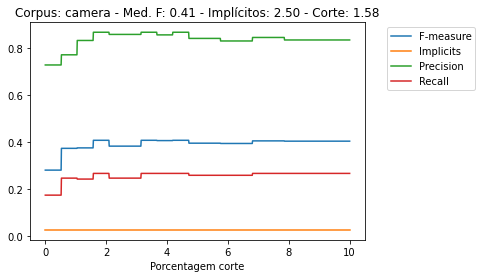

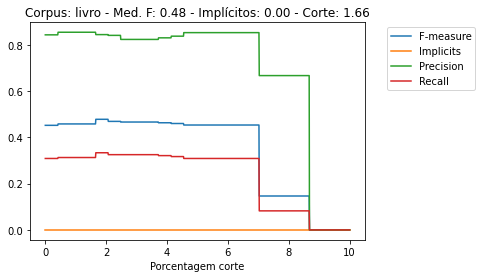

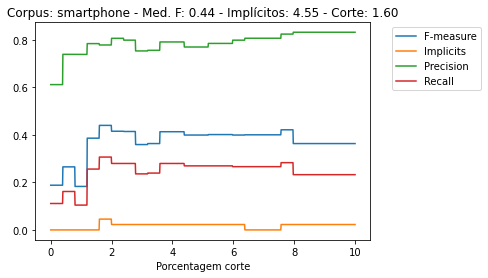

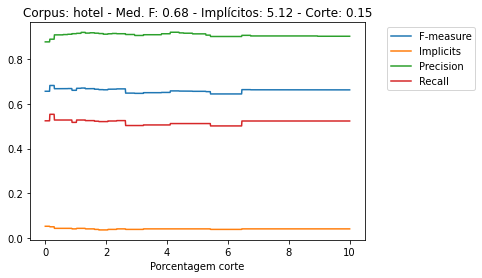

\begin{table}[!htb]
\centering
\caption{Hu \& Liu: Vargas Datasets}
\label{tab:huLiu}
\begin{tabular}{lcccccc}
    \hline
    Dataset &  \% Corte & Prec. & Rev. & F & \% Exp. & \% Imp.   \\ \hline
Câmera     &  1,58 &  0,71 & 0,23 & 0,35 & 9,89 & 0,00 \\
Livro      &  1,66 &  0,68 & 0,44 & 0,53 & 9,76 & 0,00 \\
Smartphone &  1,60 &  0,74 & 0,33 & 0,46 & 11,94 & 8,33 \\ \hline
\end{tabular}
\end{table}



In [60]:
arquivo = "huLiu.json"
if os.path.exists(arquivo):
    os.remove(arquivo)
resultados = []
# aplicando corte entre 0% e 1% com incremento de 0.01
for dataset in datasets:
    for i in np.arange(0, 0.1001, 0.0001):
        i = round(i,4)
        res = huLiu(dataset, idioma='pt', cutValue=i, debugFlag=False, arquivo=arquivo)
        resultados.append(res)
num_lines = sum(1 for line in open(arquivo))
resHuLiu = huliuCharts(arquivo)

In [64]:
# resultados com tipologia
huLiu('camera',     idioma='pt', cutValue=0.0158, debugFlag=False, arquivo='huliu.json', trainOnly=False)
huLiu('livro',      idioma='pt', cutValue=0.0166, debugFlag=False, arquivo='huliu.json', trainOnly=False)
huLiu('smartphone', idioma='pt', cutValue=0.0160, debugFlag=False, arquivo='huliu.json', trainOnly=False)
huLiu('hotel',      idioma='pt', cutValue=0.0015, debugFlag=False, arquivo='huliu.json', trainOnly=False)

{'totalAspects': 518,
 'pred': 96,
 'tp': 237,
 'fp': 65,
 'fn': 281,
 'precisao': 0.7847682119205298,
 'precisaoLaplace': 0.7828947368421053,
 'revocacao': 0.4575289575289575,
 'medidaf': 0.5780487804878048,
 'totalExplicitos': 292,
 'explicitosOk': 21,
 'pExplicitos': 0.07191780821917808,
 'explicitsList': ['funcionário',
  'toalha',
  'cidade',
  'corredor',
  'recepção',
  'carpete',
  'instalações',
  'localização',
  'aeroporto',
  'preço',
  'quarto',
  'chuveiro',
  'apartamento',
  'hotel',
  'conforto',
  'internet',
  'funcionários',
  'atendimento',
  'serviço',
  'limpeza',
  'elevador'],
 'totalImplicitos': 226,
 'implicitosOk': 18,
 'pImplicitos': 0.07964601769911504,
 'implicitsList': ['café',
  'aquecedor',
  'carpete',
  'transfer',
  'proximo',
  'localização',
  'sujo',
  'banheiro',
  'quarto',
  'chuveiro',
  'apartamento',
  'barato',
  'chiqueiro',
  'atendimento',
  'limpeza',
  'elevador',
  'cama',
  'banheiros'],
 'tipos': {'Feature': {'Is-a': 5, 'Part-of': 

## Hu Liu Word2Vec

4004


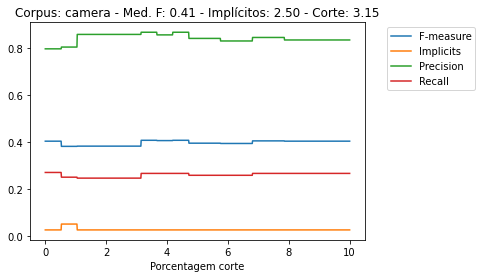

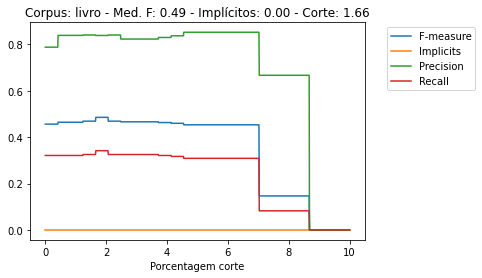

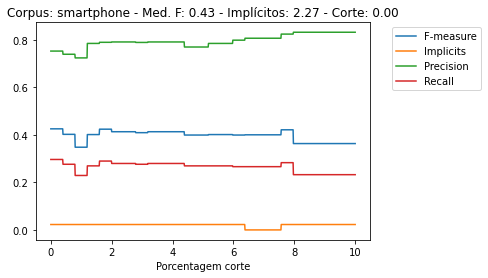

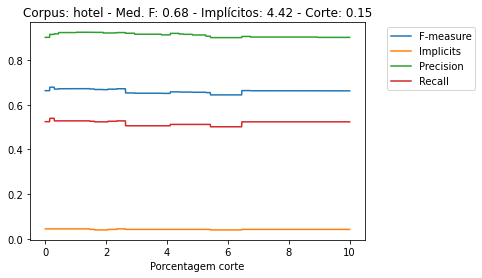

\begin{table}[!htb]
\centering
\caption{Hu \& Liu: Vargas Datasets}
\label{tab:huLiuW2V}
\begin{tabular}{lcccccc}
    \hline
    Dataset &  \% Corte & Prec. & Rev. & F & \% Exp. & \% Imp.   \\ \hline
Câmera     &  3,15 &  0,71 & 0,23 & 0,35 & 9,89 & 0,00 \\
Livro      &  1,66 &  0,70 & 0,43 & 0,53 & 8,54 & 0,00 \\
Smartphone &  0,00 &  0,64 & 0,30 & 0,41 & 11,94 & 8,33 \\ \hline
\end{tabular}
\end{table}



In [93]:
arquivo = 'huLiuW2V.json'
if os.path.exists(arquivo):
    os.remove(arquivo)
resultados = []
# aplicando corte entre 0% e 1% com incremento de 0.01
for dataset in datasets:
    for i in np.arange(0, 0.1001, 0.0001):
        i = round(i,4)
        res = huLiu(dataset, idioma='pt', cutValue=i, debugFlag=False, W2V=True, arquivo=arquivo)
        resultados.append(res)
num_lines = sum(1 for line in open(arquivo))
print(num_lines)
resHuLiuW2V = huliuCharts(arquivo, W2V=True)

In [65]:
# resultados com tipologia
huLiu('camera',     idioma='pt', cutValue=0.0315, debugFlag=False, arquivo='huliuw2v.json', trainOnly=False, W2V=True, infW2V=False)
huLiu('livro',      idioma='pt', cutValue=0.0166, debugFlag=False, arquivo='huliuw2v.json', trainOnly=False, W2V=True, infW2V=False)
huLiu('smartphone', idioma='pt', cutValue=0.0000, debugFlag=False, arquivo='huliuw2v.json', trainOnly=False, W2V=True, infW2V=False)
huLiu('hotel',      idioma='pt', cutValue=0.0015, debugFlag=False, arquivo='huliuw2v.json', trainOnly=False, W2V=True, infW2V=False)

{'totalAspects': 518,
 'pred': 101,
 'tp': 243,
 'fp': 66,
 'fn': 275,
 'precisao': 0.7864077669902912,
 'precisaoLaplace': 0.7845659163987139,
 'revocacao': 0.4691119691119691,
 'medidaf': 0.5876662636033858,
 'totalExplicitos': 292,
 'explicitosOk': 23,
 'pExplicitos': 0.07876712328767123,
 'explicitsList': ['funcionário',
  'toalha',
  'cidade',
  'corredor',
  'recepção',
  'gerente',
  'carpete',
  'instalações',
  'localização',
  'aeroporto',
  'preço',
  'quarto',
  'chuveiro',
  'apartamento',
  'hotel',
  'conforto',
  'internet',
  'estacionamento',
  'funcionários',
  'atendimento',
  'serviço',
  'limpeza',
  'elevador'],
 'totalImplicitos': 226,
 'implicitosOk': 21,
 'pImplicitos': 0.09292035398230089,
 'implicitsList': ['café',
  'aquecedor',
  'carpete',
  'transfer',
  'proximo',
  'localização',
  'atendentes',
  'sujo',
  'banheiro',
  'quarto',
  'chuveiro',
  'apartamento',
  'recepcionista',
  'barato',
  'estacionamento',
  'chiqueiro',
  'atendimento',
  'limpez

## Hu Liu Word2Vec nos aspectos infrequentes

4004


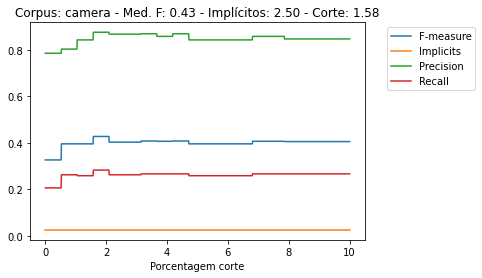

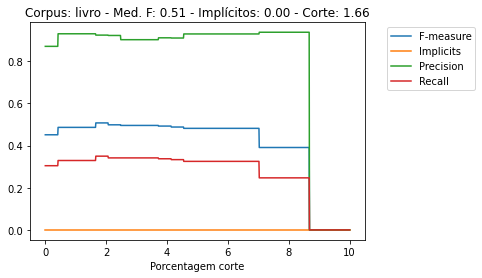

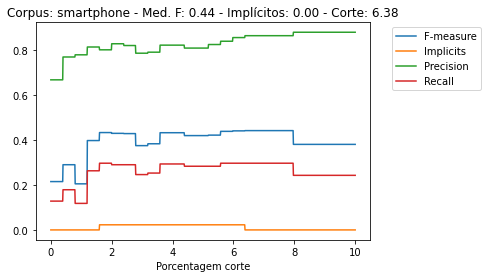

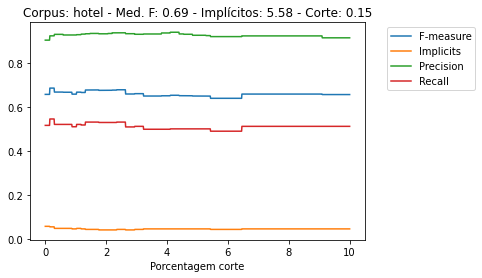

\begin{table}[!htb]
\centering
\caption{Hu \& Liu: Vargas Datasets}
\label{tab:huLiuinfW2V}
\begin{tabular}{lcccccc}
    \hline
    Dataset &  \% Corte & Prec. & Rev. & F & \% Exp. & \% Imp.   \\ \hline
Câmera     &  1,58 &  0,78 & 0,27 & 0,40 & 12,09 & 0,00 \\
Livro      &  1,66 &  0,77 & 0,43 & 0,55 & 8,54 & 0,00 \\
Smartphone &  6,38 &  0,75 & 0,28 & 0,41 & 11,94 & 4,17 \\ \hline
\end{tabular}
\end{table}



In [94]:
arquivo = 'huLiuinfW2V.json'
if os.path.exists(arquivo):
    os.remove(arquivo)
resultados = []
# aplicando corte entre 0% e 1% com incremento de 0.01
for dataset in datasets:
    for i in np.arange(0, 0.1001, 0.0001):
        i = round(i,4)
        res = huLiu(dataset, idioma='pt', cutValue=i, debugFlag=False, infW2V=True, arquivo=arquivo)
        resultados.append(res)
num_lines = sum(1 for line in open(arquivo))
print(num_lines)
resHuLiuInfW2V = huliuCharts(arquivo, infW2V=True)

In [67]:
# resultados com tipologia
huLiu('camera',     idioma='pt', cutValue=0.0158, debugFlag=False, arquivo='huliuw2vinf.json', trainOnly=False, W2V=False, infW2V=True)
huLiu('livro',      idioma='pt', cutValue=0.0166, debugFlag=False, arquivo='huliuw2vinf.json', trainOnly=False, W2V=False, infW2V=True)
huLiu('smartphone', idioma='pt', cutValue=0.0638, debugFlag=False, arquivo='huliuw2vinf.json', trainOnly=False, W2V=False, infW2V=True)
huLiu('hotel',      idioma='pt', cutValue=0.0015, debugFlag=False, arquivo='huliuw2vinf.json', trainOnly=False, W2V=False, infW2V=True)

{'totalAspects': 518,
 'pred': 83,
 'tp': 235,
 'fp': 51,
 'fn': 283,
 'precisao': 0.8216783216783217,
 'precisaoLaplace': 0.8194444444444444,
 'revocacao': 0.45366795366795365,
 'medidaf': 0.5845771144278606,
 'totalExplicitos': 292,
 'explicitosOk': 22,
 'pExplicitos': 0.07534246575342465,
 'explicitsList': ['funcionário',
  'toalha',
  'corredor',
  'recepção',
  'carpete',
  'instalações',
  'localização',
  'aeroporto',
  'preço',
  'quarto',
  'chuveiro',
  'apartamento',
  'hotel',
  'conforto',
  'internet',
  'funcionários',
  'torneira',
  'atendimento',
  'farmácia',
  'serviço',
  'limpeza',
  'elevador'],
 'totalImplicitos': 226,
 'implicitosOk': 19,
 'pImplicitos': 0.084070796460177,
 'implicitsList': ['café',
  'aquecedor',
  'carpete',
  'transfer',
  'proximo',
  'localização',
  'sujo',
  'banheiro',
  'quarto',
  'chuveiro',
  'apartamento',
  'recepcionista',
  'torneira',
  'chiqueiro',
  'atendimento',
  'limpeza',
  'elevador',
  'cama',
  'banheiros'],
 'tipos':

## Hu Liu Word2Vec e Word2Vec nos aspectos infrequentes

resultados 4004


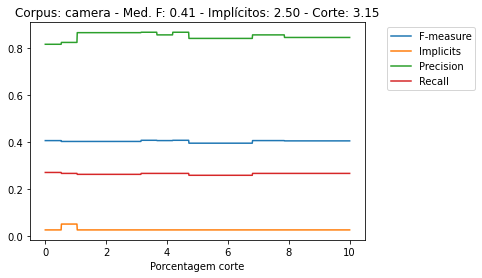

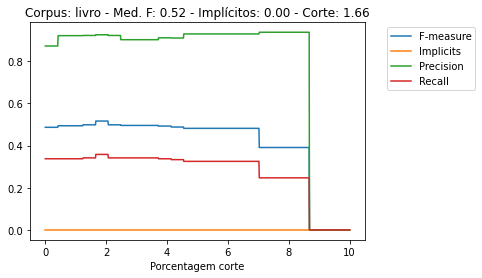

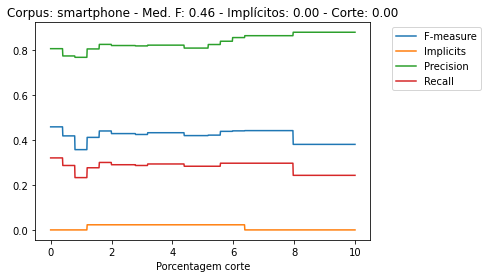

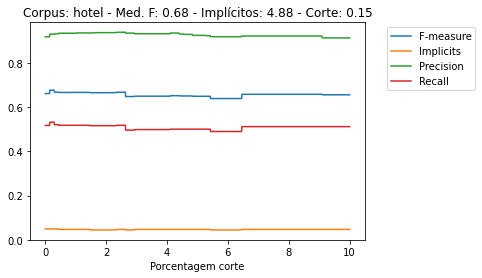

\begin{table}[!htb]
\centering
\caption{Hu \& Liu: Vargas Datasets}
\label{tab:huLiuW2VinfW2V}
\begin{tabular}{lcccccc}
    \hline
    Dataset &  \% Corte & Prec. & Rev. & F & \% Exp. & \% Imp.   \\ \hline
Câmera     &  3,15 &  0,77 & 0,26 & 0,39 & 10,99 & 0,00 \\
Livro      &  1,66 &  0,77 & 0,43 & 0,55 & 8,54 & 0,00 \\
Smartphone &  0,00 &  0,72 & 0,29 & 0,41 & 11,19 & 4,17 \\ \hline
\end{tabular}
\end{table}



In [95]:
arquivo = 'huLiuW2VinfW2V.json'
if os.path.exists(arquivo):
    os.remove(arquivo)
resultados = []
# aplicando corte entre 0% e 1% com incremento de 0.01
for dataset in datasets:
    for i in np.arange(0, 0.1001, 0.0001):
        i = round(i,4)
        res = huLiu(dataset, idioma='pt', cutValue=i, debugFlag=False, W2V=True, infW2V=True, arquivo=arquivo)
        resultados.append(res)
num_lines = sum(1 for line in open(arquivo))
print('resultados',num_lines)
resHuLiuW2VInfW2V = huliuCharts(arquivo, W2V=True, infW2V=True)

In [68]:
# resultados com tipologia
huLiu('camera',     idioma='pt', cutValue=0.0315, debugFlag=False, arquivo='huliuw2vw2vinf.json', trainOnly=False, W2V=True, infW2V=True)
huLiu('livro',      idioma='pt', cutValue=0.0166, debugFlag=False, arquivo='huliuw2vw2vinf.json', trainOnly=False, W2V=True, infW2V=True)
huLiu('smartphone', idioma='pt', cutValue=0.0000, debugFlag=False, arquivo='huliuw2vw2vinf.json', trainOnly=False, W2V=True, infW2V=True)
huLiu('hotel',      idioma='pt', cutValue=0.0015, debugFlag=False, arquivo='huliuw2vw2vinf.json', trainOnly=False, W2V=True, infW2V=True)

{'totalAspects': 518,
 'pred': 83,
 'tp': 238,
 'fp': 49,
 'fn': 280,
 'precisao': 0.8292682926829268,
 'precisaoLaplace': 0.8269896193771626,
 'revocacao': 0.4594594594594595,
 'medidaf': 0.591304347826087,
 'totalExplicitos': 292,
 'explicitosOk': 23,
 'pExplicitos': 0.07876712328767123,
 'explicitsList': ['funcionário',
  'toalha',
  'corredor',
  'recepção',
  'gerente',
  'carpete',
  'instalações',
  'localização',
  'aeroporto',
  'preço',
  'quarto',
  'chuveiro',
  'apartamento',
  'hotel',
  'conforto',
  'internet',
  'estacionamento',
  'funcionários',
  'atendimento',
  'farmácia',
  'serviço',
  'limpeza',
  'elevador'],
 'totalImplicitos': 226,
 'implicitosOk': 20,
 'pImplicitos': 0.08849557522123894,
 'implicitsList': ['café',
  'aquecedor',
  'carpete',
  'transfer',
  'proximo',
  'localização',
  'atendentes',
  'sujo',
  'banheiro',
  'quarto',
  'chuveiro',
  'apartamento',
  'recepcionista',
  'estacionamento',
  'chiqueiro',
  'atendimento',
  'limpeza',
  'eleva